# Unsupervised Machine Learning - Clustering

1. Import Libraries
2. Import Data
3. Cleaning and Preparing Data
4. Standardization and PCA - k-means Clustering
5. Standardization without PCA - k-means Clustering
6. Conclusion

# 1 Import Libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

# 2 Import Data

In [80]:
path = r'C:\Users\benar\CareerFoundry\01-2024 IMDB Movies Analysis'

In [81]:
df_mov = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Movies_clean.csv'))

In [82]:
df_mov.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


# 3 Cleaning and Preparing Data

In [83]:
df_mov.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2169
gross        186
company        0
runtime        0
dtype: int64

In [84]:
# replace missing values in gross column with median values grouped by year
df_mov['gross'].fillna(df_mov.groupby('year')['gross'].transform('median'), inplace = True)

In [85]:
df_mov.isnull().sum()

name           0
rating         0
genre          0
year           0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2169
gross          0
company        0
runtime        0
dtype: int64

In [86]:
# replace missing values in budget column with median values grouped by year
df_mov['budget'].fillna(df_mov.groupby('year')['budget'].transform('median'), inplace = True)

In [87]:
df_mov.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [88]:
df_mov['budget'].max()

356000000.0

In [89]:
df_mov['gross'].max()

2847246203.0

In [90]:
df_mov.columns

Index(['name', 'rating', 'genre', 'year', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [91]:
# Creating subset without categorical variables
sub = df_mov[['score', 'votes', 'budget', 'gross', 'runtime']]
sub.head()

,score,votes,budget,gross,runtime
0,8.4,927000,19000000.0,46998772.0,146
1,5.8,65000,4500000.0,58853106.0,104
2,8.7,1200000,18000000.0,538375067.0,124
3,7.7,221000,3500000.0,83453539.0,88
4,7.3,108000,6000000.0,39846344.0,98


# 4 Standardization and PCA - k-means Clustering

In [92]:
# standardizing data
scaler = StandardScaler()
sub_std = scaler.fit_transform(sub)

In [93]:
# fitting data using PCA
pca = PCA()
pca.fit(sub_std)

PCA()

In [94]:
pca.explained_variance_ratio_

array([0.51125634, 0.23039314, 0.13633823, 0.07869608, 0.04331622])

Text(0, 0.5, 'Cumulative Explained Variance')

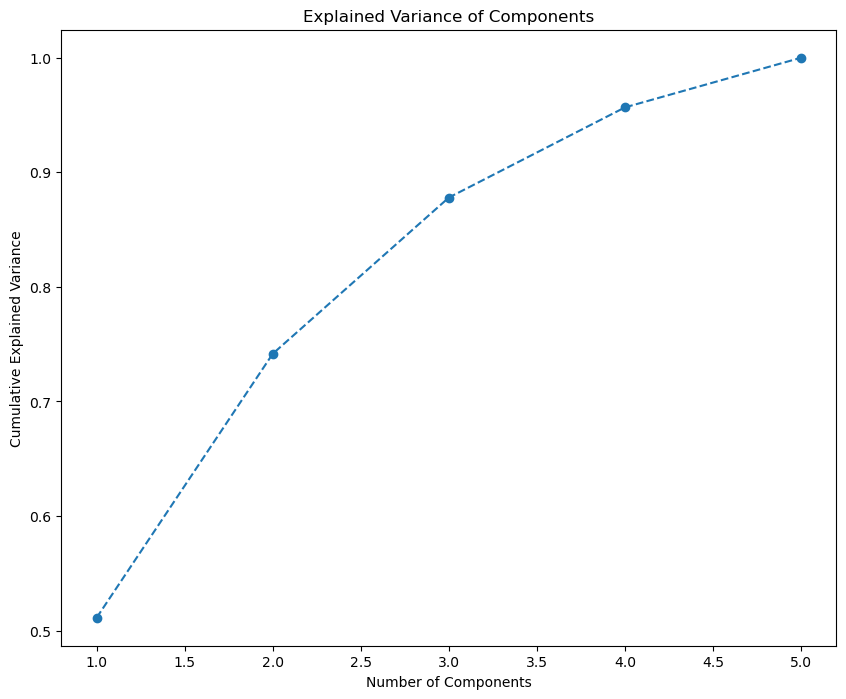

In [95]:
plt.figure(figsize = (10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [96]:
# seting pca components number to 3 based on graph above
pca = PCA(n_components = 3)

In [97]:
# fit the model of data to PCA with 3 components
pca.fit(sub_std)

PCA(n_components=3)

In [98]:
pca.transform(sub_std)

array([[ 3.7492804 ,  2.75527469, -1.59266039],
       [-0.74347982, -0.14750889, -0.01607589],
       [ 5.85957331,  1.38471122, -3.61079519],
       ...,
       [-0.57637405, -0.25596957,  0.35714692],
       [ 0.48302146,  1.89739975, -0.33574511],
       [-0.14551808, -0.97277012,  0.3493376 ]])

In [99]:
# Creating PCA scores array
scores_pca = pca.transform(sub_std)

In [100]:
# Fitting PCA data to k means
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

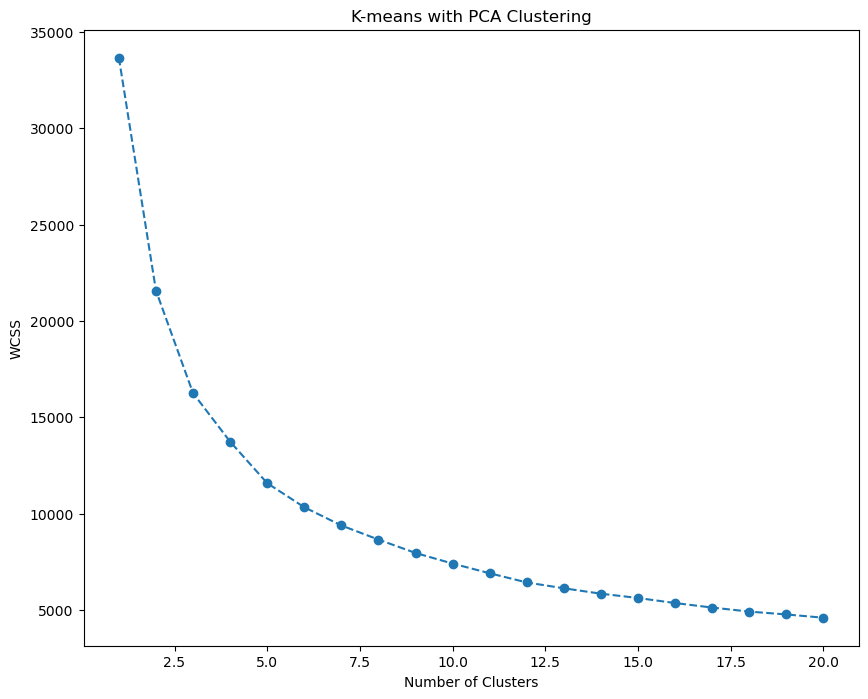

In [101]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Clusters based on the graph above is 3

In [102]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [103]:
# Fitting data with k-means pca model
kmeans_pca.fit(scores_pca)

C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [104]:
# creating new dataframe with original features and pca scores with clusters
df_pca_kmeans = pd.concat([sub.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_pca_kmeans['Kmeans PCA Cluster'] = kmeans_pca.labels_

In [105]:
df_pca_kmeans.head()

,score,votes,budget,gross,runtime,Component 1,Component 2,Component 3,Kmeans PCA Cluster
0,8.4,927000,19000000.0,46998772.0,146,3.749280,2.755275,-1.592660,0
1,5.8,65000,4500000.0,58853106.0,104,-0.743480,-0.147509,-0.016076,1
2,8.7,1200000,18000000.0,538375067.0,124,5.859573,1.384711,-3.610795,2
3,7.7,221000,3500000.0,83453539.0,88,0.119502,0.757296,-1.883980,0
4,7.3,108000,6000000.0,39846344.0,98,-0.280866,0.781479,-0.966931,0


In [106]:
df_pca_kmeans['Kmeans PCA Cluster'].value_counts()

Kmeans PCA Cluster
1    4375
0    2821
2     471
Name: count, dtype: int64

In [107]:
# Add column to label clusters 
df_pca_kmeans['Segment'] = df_pca_kmeans['Kmeans PCA Cluster'].map({0:'first', 1:'second', 2:'third'})

In [108]:
df_pca_kmeans.head()

,score,votes,budget,gross,runtime,Component 1,Component 2,Component 3,Kmeans PCA Cluster,Segment
0,8.4,927000,19000000.0,46998772.0,146,3.749280,2.755275,-1.592660,0,first
1,5.8,65000,4500000.0,58853106.0,104,-0.743480,-0.147509,-0.016076,1,second
2,8.7,1200000,18000000.0,538375067.0,124,5.859573,1.384711,-3.610795,2,third
3,7.7,221000,3500000.0,83453539.0,88,0.119502,0.757296,-1.883980,0,first
4,7.3,108000,6000000.0,39846344.0,98,-0.280866,0.781479,-0.966931,0,first


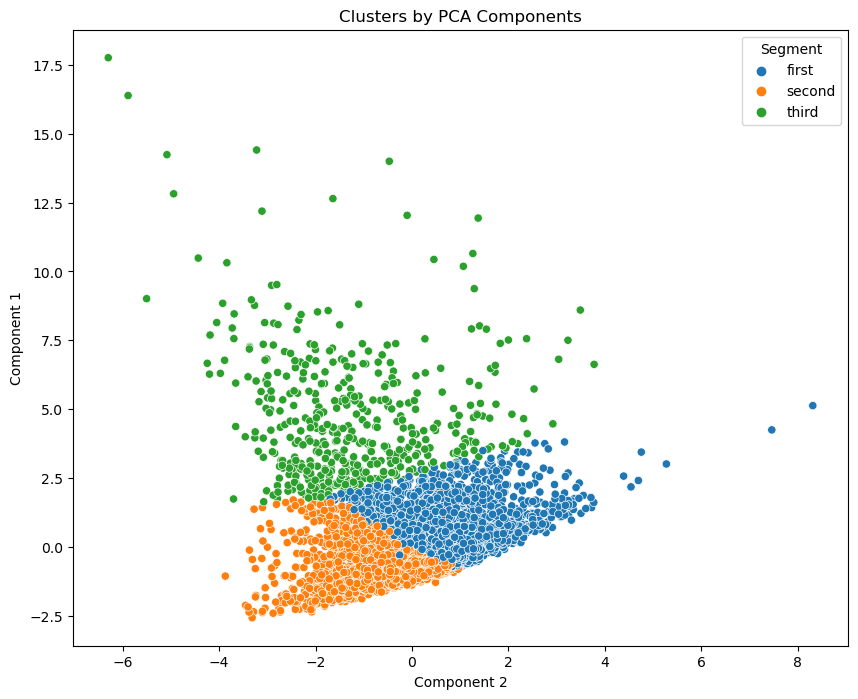

In [109]:
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

I think this is what I should do when looking into a Unsupervised Machine Learning Cluster Analysis, as the range and scale of many of the variables in the original dataset are not similar, however, I struggle to make sense of this visual and understand what it means

# 5 Standardization without PCA - k-means Clustering

In [110]:
sub.columns

Index(['score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')

In [111]:
df_sub_std = pd.DataFrame(sub_std, columns = ('score', 'votes', 'budget', 'gross', 'runtime'))
df_sub_std.head()

,score,votes,budget,gross,runtime
0,2.073568,5.137322,-0.341310,-0.183423,2.085366
1,-0.609699,-0.141371,-0.743156,-0.111146,-0.175444
2,2.383176,6.809112,-0.369023,2.812577,0.901132
3,1.351150,0.813938,-0.770870,0.038847,-1.036705
4,0.938340,0.121952,-0.701586,-0.227033,-0.498417


In [112]:
# determing k means clusters 
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [113]:
# setting score variable
score = [kmeans[i].fit(df_sub_std).score(df_sub_std) for i in range(len(kmeans))] 
score

C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-38335.00000000001,
 -26235.321886314076,
 -20855.50053128836,
 -18067.05571147033,
 -15700.175580513729,
 -13894.918239696177,
 -12836.84911161443,
 -11863.156229627702,
 -11005.16860710206]

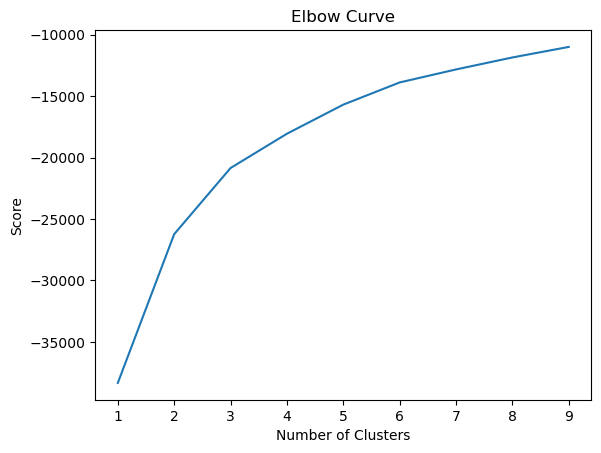

In [114]:
# plotting elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

#Exporting viz
pl.savefig(os.path.join(path, 'Analysis','Visualizations', 'elbow_curve_clusters.png'))

pl.show()

3 Clusters based on graph above because the slope of the graph smoothes out at 3 clusters

In [115]:
# Creating the k means object.
kmeans = KMeans(n_clusters = 3) 

In [116]:
# Fiting k means to standardized data.

kmeans.fit(df_sub_std)

C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [117]:
sub['clusters'] = kmeans.fit_predict(df_sub_std)
sub

C:\Users\benar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\benar\AppData\Local\Temp\ipykernel_16116\2178569136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(df_sub_std)


,score,votes,budget,gross,runtime,clusters
0,8.4,927000,19000000.0,46998772.0,146,0
1,5.8,65000,4500000.0,58853106.0,104,1
2,8.7,1200000,18000000.0,538375067.0,124,0
3,7.7,221000,3500000.0,83453539.0,88,2
4,7.3,108000,6000000.0,39846344.0,98,2
...,...,...,...,...,...,...
7662,3.1,18,7000.0,166534027.0,90,1
7663,4.7,36,43500000.0,166534027.0,90,1
7664,5.7,29,58750.0,166534027.0,110,1
7665,8.4,9,15000.0,166534027.0,120,2


In [118]:
sub['clusters'].value_counts()

clusters
1    4094
2    3069
0     504
Name: count, dtype: int64

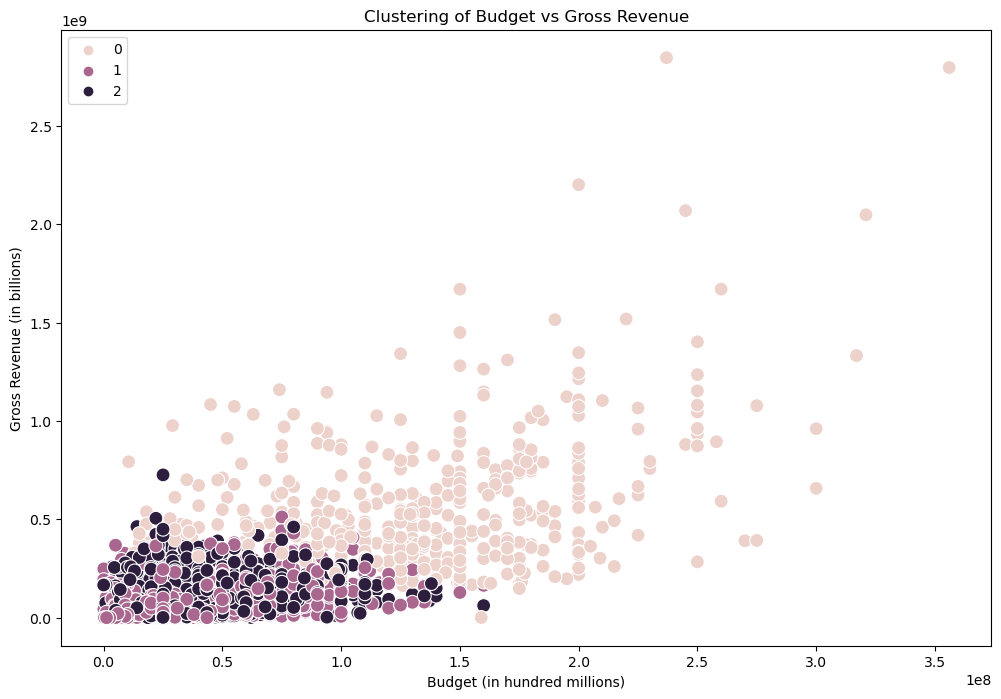

In [123]:
# Plotting budget vs gross revenue
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['budget'], y=sub['gross'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Budget (in hundred millions)')
plt.ylabel('Gross Revenue (in billions)')
plt.title('Clustering of Budget vs Gross Revenue')

#Exporting viz
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'cluster_budget_gross.png'))

plt.show()

Based on the clustering, it could be concluded that movies having a budget of 150 million or higher is not normal, or perhaps even an outlier, based on cluster 1. A large bulk of movies have budgets of 100 million and rarely exceed gross revenue of 500 million. There is not much distinction between cluster 0 and 2 in this graph.

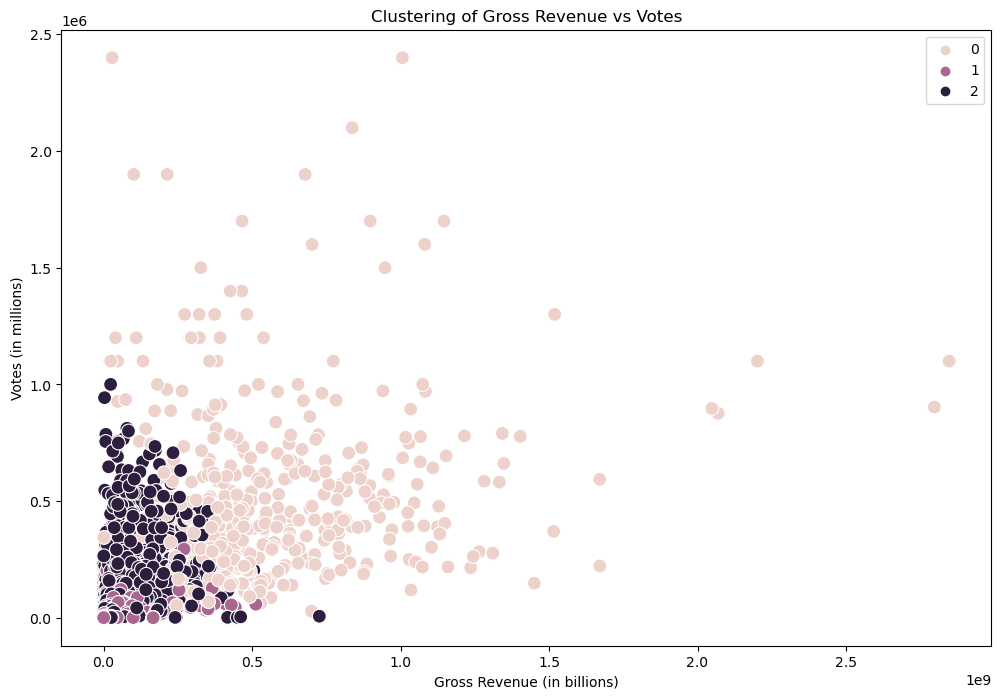

In [124]:
# Plotting votes vs gross revenue
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['gross'], y=sub['votes'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Gross Revenue (in billions)')
plt.ylabel('Votes (in millions)')
plt.title('Clustering of Gross Revenue vs Votes')

#Exporting viz
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'cluster_gross_votes.png'))

plt.show()

As was the case in the first graph, it can also be concluded based on this graph that movies with a gross revenue above 500 million is not normal, or an outlier, based on cluster 1. Cluster 2 is also distinctive as most movies have around 1 million to ~50000 votes. The gross revenue of these films does not even reach 500 million except for one outlier. It can also be determined in this graph, with help from the clustering to highlight the significance, that revenue is not the best predictor for votes. The movie with the most votes at also 2.5 million, in cluster 1, is below that 500 million gross revenue mark. In cluster 2, the movies with the most votes within this cluster have lower gross revenue than the outliers that are close or exceed 500 million. Cluster 0 is not very distinctive in this graph.

In [121]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\benar\AppData\Local\Temp\ipykernel_16116\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [122]:
sub.groupby('cluster').agg({'score':['mean', 'median'], 
                         'votes':['mean', 'median'], 
                         'budget':['mean', 'median'],
                          'gross':['mean', 'median'],
                          'runtime':['mean', 'median']})

score                 votes                  budget  \
                 mean median           mean    median          mean   
cluster                                                               
dark purple  7.084783    7.1   99553.767351   56000.0  2.756024e+07   
pink         7.069444    7.0  475097.222222  382500.0  1.282849e+08   
purple       5.786981    5.9   31844.699316   16000.0  2.219322e+07   

                                 gross                  runtime         
                  median          mean       median        mean median  
cluster                                                                 
dark purple   25000000.0  5.830083e+07   25059640.0  117.880743  115.0  
pink         130000000.0  5.344833e+08  439826225.5  123.577381  122.5  
purple        16750000.0  3.485203e+07   12453565.0   97.288227   97.0

The dark purple Cluster, or cluster 2 in the graphs, represents movies that are lower rated in score, get less votes, have less median budget and revenue, and are also shorter films in runtime. This is a large bulk of the 7000+ movies in the dataset. The purple cluster, meanwhile, has the highest rated films, has the second gross revenue and a reasonable runtime of 1 hour and 55 minutes. Pink is the cluster of outliers, in a sense, as it has a very high budget, and gross revenue, but also doesn't have that high of a median or average score rating, and the runtime could be long for some people at over 2 hours.

These summary statistics in totality suggest that most movies throughout the years breakeven or even just make a little profit, unless you are part of an outlier and had an insanely high budget that also has a higher revenue. Movies under 2 hours are the most safe options for producing.

# 6 Conclusions

This analysis does make me wonder about other factors that could be influencing these summary statistics above. For example, do the really high gross revenue films in cluster 2 share a categorical variable that might explain their outlier type nature? Do they have the same/similar genre? Do they have the same mpaa rating? Do they all have bigtime directors or stars that draw auidences in? 

It even makes me wonder about things I can't analyze because my dataset isn't fit for it. For example:Does cluster 2 have such a high revenue because they are longer films and might have higher ticket prices? I wish my dataset had this variable so I could check.

Overall, this analysis of the clustering of the data was very helpful to see groupings and how they differ/interact with the others. It also leads to interesting questions to further explore with categorical data added to the mix.

In [45]:
# Export cluster dataset
sub.to_csv(os.path.join(path, 'Data','Prepared Data', 'Movies_clean_cluster.csv'))